<a href="https://colab.research.google.com/github/itspriiyanshu/SpringML/blob/main/SMILEmolecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data & Preprocess**

In [1]:
import pandas as pd

org=pd.read_csv('/content/drive/MyDrive/similarity+prediction-1/dataset_Similarity_Prediction/original_training_set/original_training_set.csv')
new=pd.read_csv('/content/drive/MyDrive/similarity+prediction-1/dataset_Similarity_Prediction/new_dataset/new_dataset.csv')
new=new.drop(columns=['pair_type','dissimil_2D','dissimil_3D'],axis=1)
# print(new.head())
# inputs=new[['tanimoto_cdk_Extended','TanimotoCombo']]
# # target=new['frac_similar']
# target=new[['simil_2D','simil_3D']]
inputs=new[['tanimoto_cdk_Extended','TanimotoCombo']]
# target=new['frac_similar']
target=new['frac_similar']
X=inputs
y=target
print(inputs.head())
print(target.head())

   tanimoto_cdk_Extended  TanimotoCombo
0               0.567010          1.989
1               0.532051          1.782
2               0.549206          1.778
3               0.558952          1.764
4               0.452685          1.757
0    0.818182
1    0.562500
2    0.380952
3    0.750000
4    0.652174
Name: frac_similar, dtype: float64


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Build NN

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 18.3092 - mae: 3.8414 - val_loss: 16.9657 - val_mae: 3.7213
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.2225 - mae: 3.7605 - val_loss: 15.8895 - val_mae: 3.5930
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.0056 - mae: 3.7495 - val_loss: 14.8911 - val_mae: 3.4705
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.4557 - mae: 3.6644 - val_loss: 13.9478 - val_mae: 3.3500
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.0198 - mae: 3.8761 - val_loss: 13.0256 - val_mae: 3.2272
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.3373 - mae: 3.3954 - val_loss: 12.0695 - val_mae: 3.0921
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.4338 - mae: 3.1610 - val_loss: 11.0545 - val_mae: 2.9416
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.0402 - mae: 3.0739 - val_loss: 10.0307 - val_mae: 2.7798
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.9763 - mae: 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

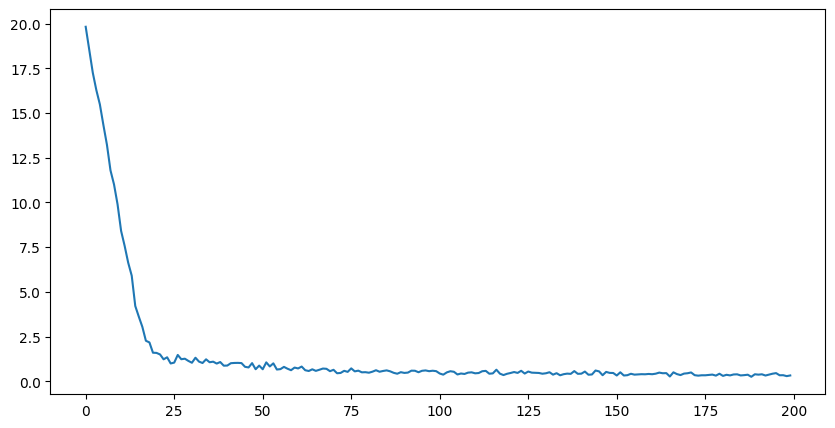

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


model = Sequential([
    Dense(32, activation='relu', input_dim=2, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(X_train, y_train,validation_split=0.2,epochs=200,batch_size=8,callbacks=[early_stopping],verbose=1)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error(MAE)", mae)
print("R² Score:", r2)


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt

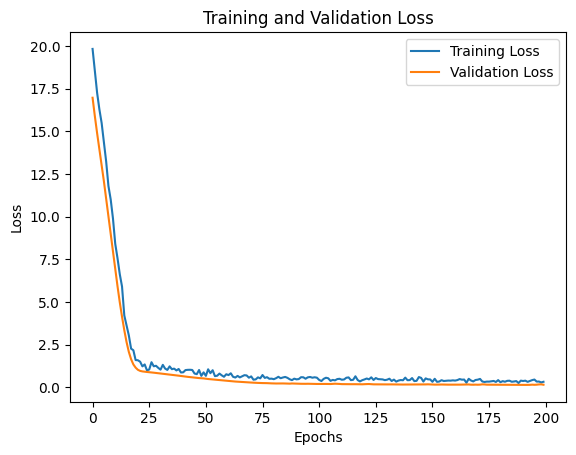

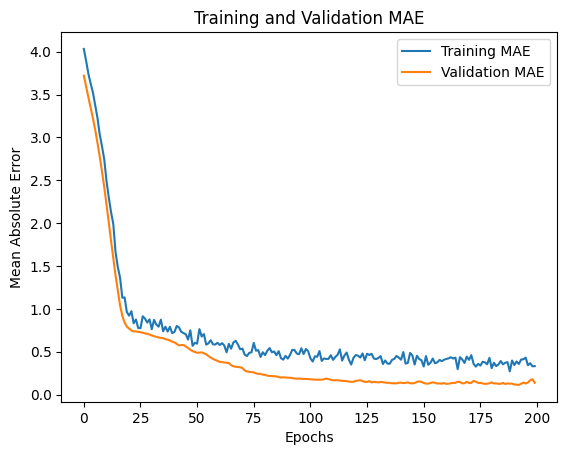

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

if 'mae' in history.history:
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.title('Training and Validation MAE')
    plt.show()
